In [57]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

seq = keras.Sequential(
    [
        keras.Input(
            shape=(None, 64, 64, 1)
        ),  # Variable-length sequence of 40x40x1 frames
        layers.ConvLSTM2D(
            filters=40, kernel_size=(3, 3), padding="same", return_sequences=True
        ),
        layers.BatchNormalization(),
        layers.ConvLSTM2D(
            filters=40, kernel_size=(3, 3), padding="same", return_sequences=True
        ),
        layers.BatchNormalization(),
        layers.ConvLSTM2D(
            filters=40, kernel_size=(3, 3), padding="same", return_sequences=True
        ),
        layers.BatchNormalization(),
        layers.ConvLSTM2D(
            filters=40, kernel_size=(3, 3), padding="same", return_sequences=True
        ),
        layers.BatchNormalization(),
        layers.Conv3D(
            filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
        ),
    ]
)
seq.compile(loss="binary_crossentropy", optimizer="adadelta")
checkpoint = tf.train.Checkpoint(generator=seq)

In [58]:


data = np.load("mnist_test_seq.npy")
# train_set = np.concatenate((data[0:4],data[4:8],data[8:12],data[12:16]),axis=1)
train_set = np.concatenate((data[0:8],data[8:16]),axis=1)
test_set = data[12:20]

Y_train = np.expand_dims(train_set[1:8].transpose(1,0,2,3), axis=4)
X_train = np.expand_dims(train_set[0:7].transpose(1,0,2,3), axis=4)

Y_test = np.expand_dims(test_set[1:8].transpose(1,0,2,3), axis=4)
X_test = np.expand_dims(test_set[0:7].transpose(1,0,2,3), axis=4)

epochs = 10

# checkpoint.restore(tf.train.latest_checkpoint("Generator"))

seq.fit(
    X_train[:1000],
    Y_train[:1000],
    batch_size=10,
    epochs=epochs,
    verbose=2,
    validation_split=0.1,
    )

checkpoint.save(file_prefix = "Generator/ckpt")


Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing t

'Generator/ckpt-1'

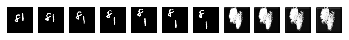

In [61]:
# checkpoint.save(file_prefix = "Generator/ckpt")
# checkpoint.restore(tf.train.latest_checkpoint("Generator"))
track = X_test[2]

for j in range(4):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)
    
for i in range(11):
    plt.subplot(1,11,i+1)
    plt.imshow(track[i,:,:].squeeze(), cmap='gray')
    plt.axis("off")
plt.show()

In [9]:
noisy_movies.shape, shifted_movies.shape

((1200, 15, 40, 40, 1), (1200, 15, 40, 40, 1))

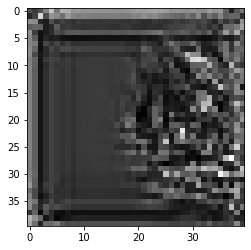

In [27]:
import matplotlib.pyplot as plt

plt.imshow(new[:,:,:].squeeze(), cmap='gray')

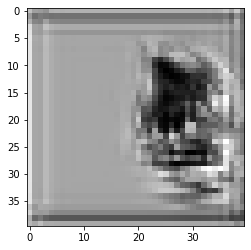

In [45]:
plt.imshow(track[9,:,:].squeeze(), cmap='gray')